In [154]:
import pandas as pd
import numpy as np
from nilearn import plotting
from sklearn.preprocessing import StandardScaler
import nilearn
from nilearn.maskers import NiftiMasker
from tqdm import tqdm
mdmr_dir = "/home/changbae/fmri_project/C-PAC/CPAC/bcb_mdmr/"

regressor_df = pd.read_csv(
    f"{mdmr_dir}/input/gangnam_total_LSAS_regressor.csv"
)

subject_id_list = regressor_df["Participant"].values

subject_id = subject_id_list[1]
for subject_id in subject_id_list:
    seed_masker = NiftiMasker(
        mask_img = "/mnt/NAS2-2/data/SAD_gangnam_MDMR/6mm/gangnam_sad/LSAS/result/significant_cluster.nii.gz",
        standardize="zscore_sample",
        #standardize_confounds="zscore_sample",
    )
    func_filename = f"/mnt/NAS2-2/data/SAD_gangnam_resting_2/fMRIPrep_total/sub-{subject_id}/ses-01/func/sub-{subject_id}_ses-01_task-rest_space-MNI152NLin2009cAsym_desc-smoothed6mm_resampled4mm_bold.nii.gz"
    confound_filename = f"/mnt/NAS2-2/data/SAD_gangnam_seed_based_analysis/modified_confounds/sub-{subject_id}_ses-01_task-rest_desc-confounds_timeseries_modified.tsv"
    seed_time_series = seed_masker.fit_transform(
        func_filename,#confounds=[confound_filename]
    )
    smoothness = 6
    brain_masker = NiftiMasker(
        mask_img = f"/home/changbae/fmri_project/C-PAC/CPAC/bcb_mdmr/template/gangnam_total_final_group_mask_{smoothness}mm.nii.gz",
        standardize="zscore_sample",
        #standardize_confounds="zscore_sample",
    )
    brain_time_series = brain_masker.fit_transform(
        func_filename,#confounds=[confound_filename]
    )
    mean_seed_time_series = np.mean(seed_time_series, axis=1)
    seed_to_voxel_correlations = np.array([np.corrcoef(mean_seed_time_series, brain_time_series[:, i])[0, 1] for i in range(brain_time_series.shape[1])])

    seed_to_voxel_correlations_img = brain_masker.inverse_transform(
        seed_to_voxel_correlations.T
    )
    seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
    seed_to_voxel_correlations_fisher_z_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z.T
    )
    # 대화형 플롯 생성
    view = plotting.view_img(
        seed_to_voxel_correlations_fisher_z_img,
        title=f"{subject_id}Seed-to-voxel correlation fisher z",
        colorbar=True
    )

    # 대화형 뷰어 표시
    view.open_in_browser()


/home/changbae/anaconda3/envs/fmrienv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/changbae/anaconda3/envs/fmrienv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/changbae/anaconda3/envs/fmrienv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


KeyboardInterrupt: 

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.fit] Finished fit
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/mnt/NAS2-2/data/SAD_gangnam_resting_2/fMRIPrep_total/sub-s0005/ses-01/func/sub-s0005_ses-01_task-rest_space-MNI152NLin2009cAsym_desc-smoothed6mm_resampled4mm_bold.nii.gz')
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


FileNotFoundError: /SAD_gangnam_seed_based_analysis/modified_confounds/sub-s0005_ses-01_task-rest_desc-confounds_timeseries.tsv not found.

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.fit] Finished fit
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/mnt/NAS2-2/data/SAD_gangnam_resting_2/fMRIPrep_total/sub-s0250/ses-01/func/sub-s0250_ses-01_task-rest_space-MNI152NLin2009cAsym_desc-smoothed6mm_resampled4mm_bold.nii.gz')
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


Seed time series shape: ((152, 33))
Mean seed time series shape: (152,)
Brain time series shape: ((152, 20290))


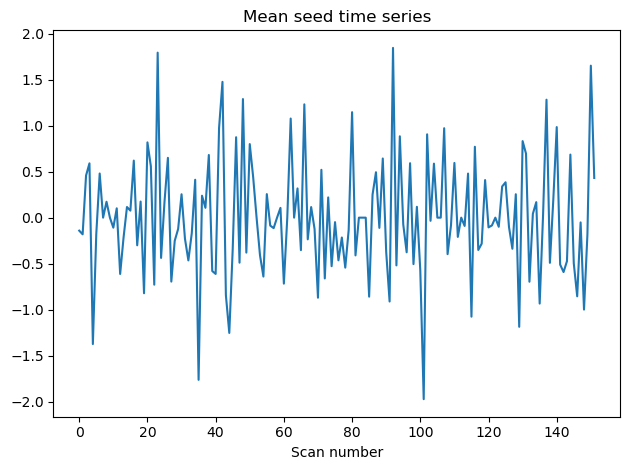

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mean_seed_time_series)
plt.title("Mean seed time series")
plt.xlabel("Scan number")
plt.tight_layout()

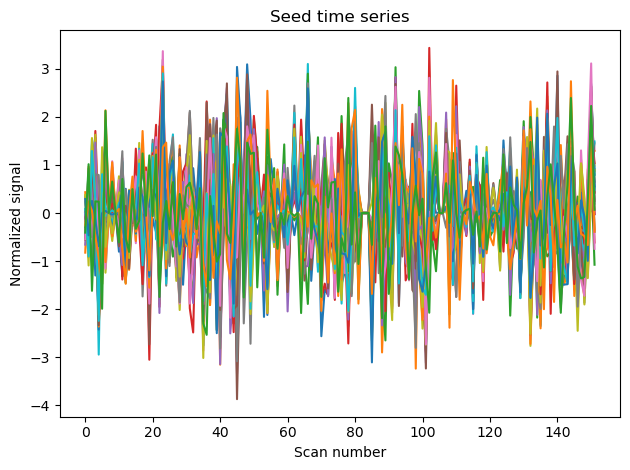

In [ ]:
import matplotlib.pyplot as plt

plt.plot(seed_time_series)
plt.title("Seed time series")
plt.xlabel("Scan number")
plt.ylabel("Normalized signal")
plt.tight_layout()

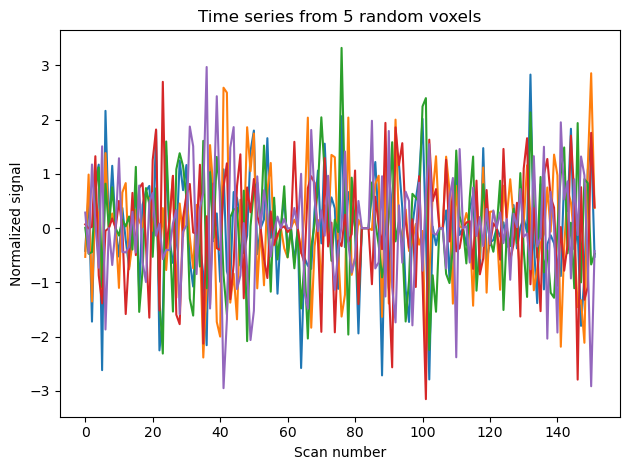

In [ ]:
plt.plot(brain_time_series[:, [10, 45, 100, 5000, 10000]])
plt.title("Time series from 5 random voxels")
plt.xlabel("Scan number")
plt.ylabel("Normalized signal")
plt.tight_layout()

In [144]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#brain_time_series_normalized = scaler.fit_transform(brain_time_series)
#mean_seed_time_series_normalized = scaler.fit_transform(mean_seed_time_series.reshape(-1, 1)).ravel()




In [145]:
print(
    f"Seed-to-voxel correlation shape: {seed_to_voxel_correlations.shape}"
)
print(
    "Seed-to-voxel correlation: min = %.3f; max = %.3f"
    % (seed_to_voxel_correlations.min(), seed_to_voxel_correlations.max())
)

Seed-to-voxel correlation shape: (20290,)
Seed-to-voxel correlation: min = -0.954; max = 0.954


In [146]:
from nilearn import plotting

# 기존 코드
seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T
)

"""# 대화형 플롯 생성
view = plotting.view_img(
    seed_to_voxel_correlations_img,
    threshold=0.5,
    vmax=1,
    title="Seed-to-voxel correlation",
    colorbar=True
)

# 대화형 뷰어 표시
view.open_in_browser()"""

/home/changbae/anaconda3/envs/fmrienv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [147]:
seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
print(
    "Seed-to-voxel correlation Fisher-z transformed: "
    f"min = {seed_to_voxel_correlations_fisher_z.min():.3f}; "
    f"max = {seed_to_voxel_correlations_fisher_z.max():.3f}f"
)

Seed-to-voxel correlation Fisher-z transformed: min = -1.873; max = 1.869f


/home/changbae/anaconda3/envs/fmrienv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
